# The purrr package
## -- DataCamp - Intermediate Tidyverse Toolbox Skill Track - Courses 2-3 --

This script containg the **Foundations of Functional Programming with purrr** and the **Intermediate Functional Programming with purrr** courses.

**DRAFT - currently only course 1 is included!**

To use this code, select the R environment in Anaconda
 
 **Used packages**
 - tidyverse
 - repurrrsive - for datasets
 
**Table of content**

- [&nbsp;&nbsp;1. Simplifying Iteration and Lists With purrr](#toc_935640_1)

**Set environment and plot size**

In [1]:
options(repr.plot.width=6, repr.plot.height=6)
library(tidyverse)
library(repurrrsive)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.5 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

**Import and prepare data**

<a name="toc_935640_1"></a>
## 1.   Introduction to lists

Lists can be created using `list()`.

In [141]:
bird_counts <- list(first = c(3, 1), 
                    second = c(3, 8, 1, 2), 
                    c(8, 3, 9, 9, 5, 5),
                    c(8, 9, 7, 9, 5, 4, 1, 5))

 List elements can be named or unnamed.

In [143]:
names(bird_counts) # here some elements are named some are not

[1] "first"  "second" ""       ""

Lists can contain mixed data types

$bird
     bird weight wing_length
1   robin     76         100
2 sparrow     14          35
3     jay    100         130

$model

Call:
lm(formula = weight ~ wing_length, data = biglist[["bird"]])

Coefficients:
(Intercept)  wing_length  
   -17.3216       0.9131  


$plot


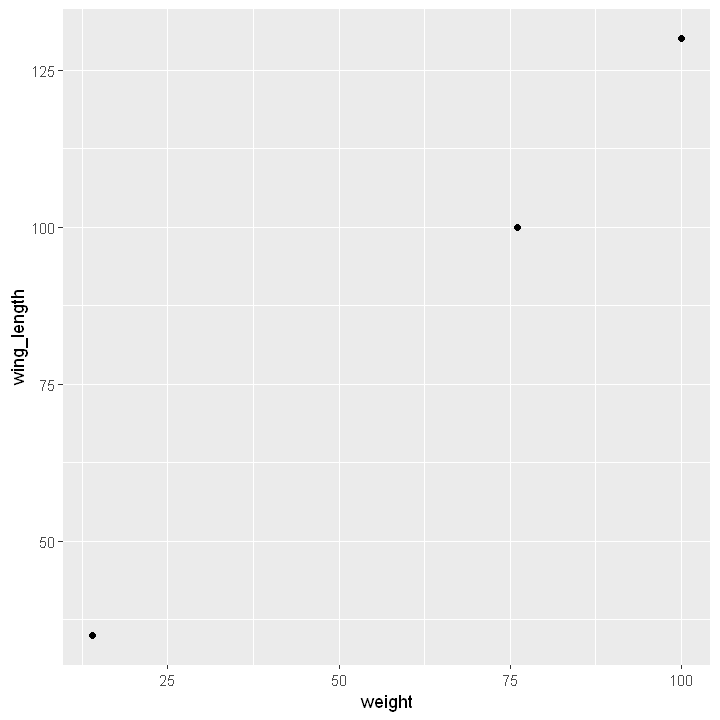

In [83]:
#Prepare our list
biglist <- list()

biglist[["bird"]] <- 
    data.frame(
        bird = c("robin", "sparrow", "jay"),
        weight = c(76, 14, 100),
        wing_length = c(100, 35, 130)
    )

biglist[["model"]] <- lm(weight ~ wing_length, data = biglist[["bird"]])

biglist[["plot"]] <- 
    ggplot(
        data = biglist[["model"]],
        aes(x = weight, y = wing_length)) +
        geom_point()

biglist

<u>Subsetting lists</u>

Indexing lists:
- `biglist[[1]]` - subsets the first element of the list by index
- `biglist[["bird"]]` - subsets the first element of the list by name
- `biglist$bird` - same result
- `biglist[[1]][2]` - for multi-level lists
- `biglist[[1]]$name` - alternative for multi-level lists

In [126]:
# Check wesanderson and the sw_films datasets from repurrrsive package
summary(wesanderson)
summary(sw_films)

               Length Class  Mode     
GrandBudapest  4      -none- character
Moonrise1      4      -none- character
Royal1         4      -none- character
Moonrise2      4      -none- character
Cavalcanti     5      -none- character
Royal2         5      -none- character
GrandBudapest2 4      -none- character
Moonrise3      5      -none- character
Chevalier      4      -none- character
Zissou         5      -none- character
FantasticFox   5      -none- character
Darjeeling     5      -none- character
Rushmore       5      -none- character
BottleRocket   7      -none- character
Darjeeling2    5      -none- character

     Length Class  Mode
[1,] 14     -none- list
[2,] 14     -none- list
[3,] 14     -none- list
[4,] 14     -none- list
[5,] 14     -none- list
[6,] 14     -none- list
[7,] 13     -none- list

In [130]:
# Third element of the first wesanderson vector
wesanderson[[1]][3]

# Alternatively
wesanderson$GrandBudapest[3]

# Subset the first element of the sw_films data, the title column 
sw_films[[1]]$title

#Alternatively
sw_films[[1]][1]

[1] "#5B1A18"

[1] "#5B1A18"

[1] "A New Hope"

$title
[1] "A New Hope"

<a name="toc_935640_2"></a>
## 2.   Simplifying iteration and lists with map functions

<a name="toc_935640_2.1"></a>
<u>**2.1  The `map()` function**</u>
    
purrr allows us to simplify iteration, either with **vectors** or **lists**, without having to deal with **for loops**. Iteration lets us do the same thing over and over again with different inputs. This means we don't have to write out repetitive lines of code for each new input. Iteration saves time, reduces lines of code, and prevents typos. 

For example, we can read in files with a separate line for each file:
<div style="text-align:center;">
  <img src="images/purrr_001.png" width = "250" align="center">
</div>

Or we can build a for loop that reads them in iteratively. When there are only three files this might not make sense, but when we are dealing with dozens or hundreds of inputs it can be a huge time saver.
<div style="text-align:center;">
  <img src="images/purrr_002.png" width = "250" align="center">
</div>

For loops are powerful, but are often one of the places where typos that are tough to identify pop up and this prevents you from moving on in your workflow.

`purrr` makes iteration easier. It wraps a for loop into a single function, `map()`, which reduces the number of lines of code we need. This means we can focus on the important pieces of what we are trying to accomplish. Instead of worrying about indexing and brackets or curly braces, we can just put in the pieces and get what we need. 

`map(object, function)` takes two arguments
- object - can be a vector or a list
- function - any function in R that takes the input object.

<u>Example 1:</u> Iteration by list elements

In [89]:
# Calculate something on each element

bird_sum <- list() # initialize list

for(i in seq_along(bird_counts)){
    bird_sum[[i]] <- sum(bird_counts[[i]])
    }

bird_sum

[[1]]
[1] 4

[[2]]
[1] 14

[[3]]
[1] 39

[[4]]
[1] 48

In [87]:
# Now with purrr
bird_sum <- map(bird_counts, sum)
bird_sum

[[1]]
[1] 4

[[2]]
[1] 14

[[3]]
[1] 39

[[4]]
[1] 48

☝️  The output of both methods is the same! However, purrr makes our code simpler by letting us focus on the pieces we are working with, instead of the structure of the for loop.

<u>Example 2:</u> Read multiple data file at once

In [14]:
files <- list.files("data/purrr")
files

[1] "data_from_1990.csv" "data_from_1991.csv" "data_from_1992.csv"
 [4] "data_from_1993.csv" "data_from_1994.csv" "data_from_1995.csv"
 [7] "data_from_1996.csv" "data_from_1997.csv" "data_from_1998.csv"
[10] "data_from_1999.csv" "data_from_2000.csv" "data_from_2001.csv"
[13] "data_from_2002.csv" "data_from_2003.csv" "data_from_2004.csv"
[16] "data_from_2005.csv"

In [86]:
# Initialize list
all_files <- list()

# For loop to read files into a list
suppressMessages(
    for(i in seq_along(files)){
      all_files[[i]] <- read_csv(file = paste0("data/purrr/", files[[i]]))
}
)

# Output size of list object
length(all_files)

[1] 16

In [22]:
# Alternatively:

suppressMessages(
    all_files_purrr <- map(paste0("data/purrr/", files), read_csv) 
)

length(all_files_purrr)

[1] 16

<u>Example 3:</u> Change class with purr

In [25]:
# Check the class type of the first element
class(bird_counts[[1]])  

[1] "numeric"

In [30]:
# Change each character element to a number
birdchar <- map(bird_counts, as.character)

# Check the class type of the first element again
class(birdchar[[1]]) 

[1] "character"

<a name="toc_935640_2.2"></a>
<u>**2.2  Alternative `map_*()` functions**</u>

`map()` returns a list. If we want to return another data object, we can use some alternative functions, like
- `map_dbl()` - return a double vector
- `map_int()` - return an integer vector
- `map_chr()` - return a character vector
- `map_dfc()` - return a dataframe with column binding
- `map_dfr()` - return a dataframe with row binding

In [93]:
map_dbl(bird_counts, sum)

[1]  4 14 39 48

In [92]:
map_chr(bird_counts, sum)

[1] "4.000000"  "14.000000" "39.000000" "48.000000"

In [90]:
map_dfc(bird_counts, sum)

New names:
* `` -> `...1`
* `` -> `...2`
* `` -> `...3`
* `` -> `...4`


...1,...2,...3,...4
<dbl>,<dbl>,<dbl>,<dbl>
4,14,39,48


<a name="toc_935640_2.3"></a>
**<u>2.3 The `~` and `.x` operators</u>**

We can put `.x` or simply `.` into the function to show `map()` where we want the given list element name to be inputted. In cases like this, we need to write the `~` operator before the function call! The `~` operator in R creates a **formula**. Formulas are useful in R because they prevent immediate evaluation of symbols, so in this case R will not take `.` literally. 

In the most simple cases, 

- `map(wesanderson, length)` and
- `map(wesanderson, ~ length(.x))`

give the same result.

However, in more complex situations, we max need to specify the exact location of the list elements within the function:

`map(data, ~ lm(mpg ~ wt, data = .))` 

is basically a shortcut for 

`map(data, function(x) {lm(mpg ~ wt, data = x)})` 

This way `map()` can change the value of `.` in the formula as needed.

In [136]:
# Check the number of rows in each element of a list. 
map_dbl(all_files, ~ nrow(.x))

[1] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200

In [12]:
# Pull out the director element of sw_films in a list and character vector
map(sw_films, ~.x[["director"]])

[[1]]
[1] "George Lucas"

[[2]]
[1] "George Lucas"

[[3]]
[1] "George Lucas"

[[4]]
[1] "George Lucas"

[[5]]
[1] "Richard Marquand"

[[6]]
[1] "Irvin Kershner"

[[7]]
[1] "J. J. Abrams"

In [15]:
map_lgl(sw_films, ~.x[["director"]] == "George Lucas")

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

<u>Example:</u> Simulating data

In [3]:
list_of_means <- list(5, 2, 300, 15)

list_of_df <- map(list_of_means,
                    ~ data.frame(site = .x, 
                                 a = rnorm(mean = .x, n = 200, sd = (5/2))
                     ))

head(list_of_df[[1]], 2)

,site,a
,<dbl>,<dbl>
1,5,5.820833
2,5,3.470739


In [9]:
map(list_of_df, ~ mean(.x$a))

[[1]]
[1] 4.903616

[[2]]
[1] 1.98722

[[3]]
[1] 299.6237

[[4]]
[1] 14.9902

<u>Example:</u> Using `map()` for modeling

In [11]:
# Run a linear model

sites <- list("north","east","west")

list_of_df2 <-  map(sites,  
  ~data.frame(sites = .x,
       a = rnorm(mean = 5, n = 200, sd = (5/2)),
       b = rnorm(mean = 200, n = 200, sd = 15)))

list_of_df2 %>%
    map(~ lm(a ~ b, data = .)) %>%
    map(summary)

[[1]]

Call:
lm(formula = a ~ b, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5152  -1.2977   0.1348   1.5111   7.7006 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.571767   2.263014   2.462   0.0147 *
b           -0.004424   0.011311  -0.391   0.6961  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.563 on 198 degrees of freedom
Multiple R-squared:  0.0007721,	Adjusted R-squared:  -0.004275 
F-statistic: 0.153 on 1 and 198 DF,  p-value: 0.6961


[[2]]

Call:
lm(formula = a ~ b, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9927 -1.6931 -0.0785  1.8932  8.9481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.96468    2.62044   0.368    0.713
b            0.02021    0.01300   1.555    0.122

Residual standard error: 2.711 on 198 degrees of freedom
Multiple R-squared:  0.01206,	Adjusted R-squared:  0.00707 
F-statistic: 2.417 on

<u>Example:</u> Using `map()` for asking questions from a list

In [21]:
# Load the data
data(gh_users)

# Determine if the repositories are user-owned, rather than organization-owned
map_lgl(gh_users, ~.x[["type"]] == "User")

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [23]:
# Which user has the most public repositories? 
map_int(gh_users, ~.x[["public_repos"]]) %>%
      set_names(map_chr(gh_users, "name")) %>%
    sort()

Julia Silge          Maëlle Salmon           Gábor Csárdi 
                    26                     31                     52 
               Jeff L.       Thomas J. Leeper Jennifer (Jenny) Bryan 
                    67                     99                    168

<a name="toc_935640_2.4"></a>
**<u>2.4 Naming unnamed lists</u>**

In [150]:
names(sw_films)

NULL

In the above list all elements containa $title infomration that we can use to name our elements. To do that, we need to extract names from the list using the `map_chr()` function. The first argument in `map_chr()` is the name of our list, `sw_films`, and our second argument is the name of the element where the names are stored, in this case, `"title"`. We then put the `map_chr()` function inside the `set_names()` function. Then we can check that setting names worked by calling the `names()` function on `sw_films`.

In [149]:
# Set names so each element of the list is named for the film title
sw_films_named <- sw_films %>% 
  set_names(map_chr(sw_films, "title")) # Iterate over the title element.

# Check to see if the names worked/are correct
names(sw_films_named)

[1] "A New Hope"              "Attack of the Clones"   
[3] "The Phantom Menace"      "Revenge of the Sith"    
[5] "Return of the Jedi"      "The Empire Strikes Back"
[7] "The Force Awakens"

A more complex example:

In [18]:
# Map over name element of list
map(gh_users, ~.x[["name"]])

# Name gh_users with the names of the users
gh_users_named <- gh_users %>% 
    set_names(map_chr(gh_users, "name"))

# Name gh_repos with the names of the repo owner
gh_repos_named <- gh_repos %>% 
    map_chr(~ .[[1]]$owner$login) %>% 
    set_names(gh_repos, .)

<a name="toc_935640_2.5"></a>
**<u>2.5 Using pipes wihin `map()`</u>**

In [147]:
map_dbl(all_files, ~.x %>%
                    nrow()
       )

[1] 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200

In [155]:
# Create a list of values from 1 through 10
numlist <- list(1,2,3,4,5,6,7,8,9,10)

# Iterate over the numlist 
map(numlist, ~.x %>% sqrt() %>% sin())

[[1]]
[1] 0.841471

[[2]]
[1] 0.9877659

[[3]]
[1] 0.9870266

[[4]]
[1] 0.9092974

[[5]]
[1] 0.7867491

[[6]]
[1] 0.6381576

[[7]]
[1] 0.4757718

[[8]]
[1] 0.3080717

[[9]]
[1] 0.14112

[[10]]
[1] -0.02068353

In [12]:
map(list_of_means, ~.x %>%
    log() %>%
    sum() %>%
    round(2)
   )

[[1]]
[1] 1.61

[[2]]
[1] 0.69

[[3]]
[1] 5.7

[[4]]
[1] 2.71

<a name="toc_935640_2.6"></a>
**<u>2.6 The `map2()`, `pmap()` and `imap()` functions</u>**

- `map2()` - apply a function to pairs of elements from two lists or vectors. When needed, we can refer to the specific lists as `.x`, and `.y`
- `pmap()` - apply a function to 3 or more lists. We need to create a list of lists we want to use, as our input, and then it will apply the function to groups of elements from a list of lists or vectors.
- `imap()` - apply a function to each element and its index.

In [25]:
# create two lists containing pairs of information
list_of_means <- list(5, 2, 300, 15)
list_of_sd <- list(0.5, 0.01, 20, 1)

# Usi map2() to simulate data
simdata <- map2(list_of_means, list_of_sd,
                ~ data.frame(a = rnorm(mean = .x, n = 200, sd = .y),
                             b = rnorm(mean = 200, n = 200, sd = 15)))
                             
head(simdata[[1]], 2)

,a,b
,<dbl>,<dbl>
1,5.249646,236.8449
2,5.250264,204.5569


In [36]:
# create a list of lists
list_of_means <- list(5, 2, 300, 15)
list_of_sd <- list(0.5, 0.01, 20, 1)
list_of_samplesize <- list(200, 120, 50, 8)

input_list <- list(
    means = list_of_means,
    sd = list_of_sd,
    samplesize = list_of_samplesize)

# Simulate data

simdata <- pmap(input_list,
                function(means, sd, samplesize)
                    data.frame(a = rnorm(mean = means, n = samplesize, sd = sd))
                )
                
head(simdata[[1]], 2)

,a
,<dbl>
1,5.670574
2,4.403826


 ☝️  Above the 2. argument of `pmap()`, is a custom function where we use the names of the elements from our inputs_list as the arguments. This allows us to use the name of those lists as our arguments instead of using `.x` or `.y`. Our new list is our simulated datasets. Each element of the list is a different dataset, in a dataframe. 

<a name="toc_935640_3"></a>
## 3.   Troubleshooting lists with purrr

This chapter gives an overview on:
- `safely()` - identify where in the list an issue is occurring
- `possibly()` - handle the detected issues
- `walk()` - it creates cleaner output.

<a name="toc_935640_3.1"></a>
**<u>3.1 The `safely()` function</u>**

When we try to `map()` over a list and one of the elements has the wrong data type, then the `map()` function will not work. For instance, if a function requires numeric input, and one of the elements has the character string "unknown", then the function won't work on that element. In these cases we can use `safely()`, inside of `map()` to identify where in the list an issue is occurring. 

The `safely()` takes a function and it also has an `otherwise` argument, where we can tell `safely()` how to deal with an input, such as a character string in a list of numerics, that it does not expect. E.g. `NA_real` will give the result as `NA` in these cases. Another argument is `quiet = FALSE` that makes error messages to be printed (TRUE by default).

In simple cases where we expect that some problems may occure, we can use if-else logic to fix problem in advance:

In [75]:
# Load sw_people data
data(sw_people)

# Map over sw_people and pull out the height element
height_cm <- map(sw_people, "height") %>%
  map(function(x){
    ifelse(x == "unknown", NA,
    as.numeric(x))
})

head(height_cm, 2)

[[1]]
[1] 172

[[2]]
[1] 167

In more complex cases or when unexpected errors can occure, it is better to use `safely()`:

In [48]:
a <- list("unknown", 10)

map(a, safely(function(x) x * 10,
           otherwise = NA_real_)) # outputs NA when the input is unexpected

[[1]]
[[1]]$result
[1] NA

[[1]]$error
<simpleError in x * 10: non-numeric argument to binary operator>


[[2]]
[[2]]$result
[1] 100

[[2]]$error
NULL



In [63]:
# Map safely over log
a <- list(10, "I can", 0) 

xy <- map(a, safely(log, otherwise = NA_real_)) %>%
      transpose() # reorder the output, so that the results come first and then the errors.

xy

$result
$result[[1]]
[1] 2.302585

$result[[2]]
[1] NA

$result[[3]]
[1] -Inf


$error
$error[[1]]
NULL

$error[[2]]
<simpleError in .Primitive("log")(x, base): non-numeric argument to mathematical function>

$error[[3]]
NULL



In [62]:
# print only the results
xy[["result"]]

[[1]]
[1] 2.302585

[[2]]
[1] NA

[[3]]
[1] -Inf

<a name="toc_935640_3.2"></a>
**<u>3.2 The `possibly()` function</u>**

While `safely()` is great for pinpointing where the issue is, and what the issue is with messy data, `possibly()` helps us get past it and get on with our day. It is a good idea to diagnose your a problem with `safely()` and then replace it with `possibly()` once the issue is resolved so that you can get the output you want and keep working.

In [79]:
a <- list("unknown", 10)

map(a, possibly(function(x) x * 10,
           otherwise = NA_real_)) # outputs NA when the input is unexpected

[[1]]
[1] NA

[[2]]
[1] 100

☝️ This is the same code as before just with `possibly` isntead of `safely`. The output is much cleaner as it only contains the results and not the error messages. This is the output we can use for our further analysis.

<a name="toc_935640_3.3"></a>
**<u>3.3 The `walk()` function</u>**

Regular list output is filled with bracketed elements and isn't very easy to read. This is why purrr has the `walk()` function, which helps make a list output more human-readable. It outputs the same information as normal list output, but it's much more compact and easier to search through.

`walk()` works much like `map()`, in that it takes both a `.x` and a function argument.

In [93]:
short_list <- list(-10, 1, 10)
print(short_list)

[[1]]
[1] -10

[[2]]
[1] 1

[[3]]
[1] 10



☝️ This output looks a bit messy.

In [88]:
walk(short_list, print)

[1] -10
[1] 1
[1] 10


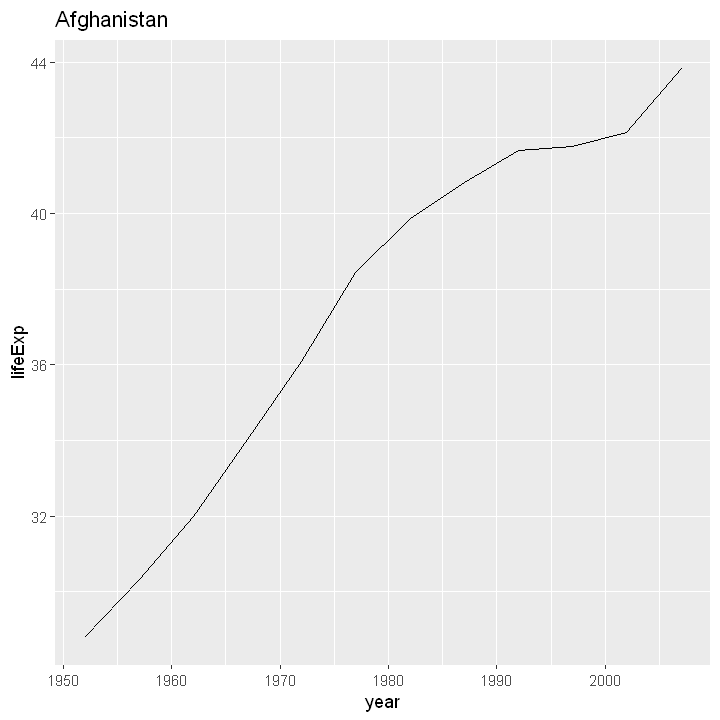

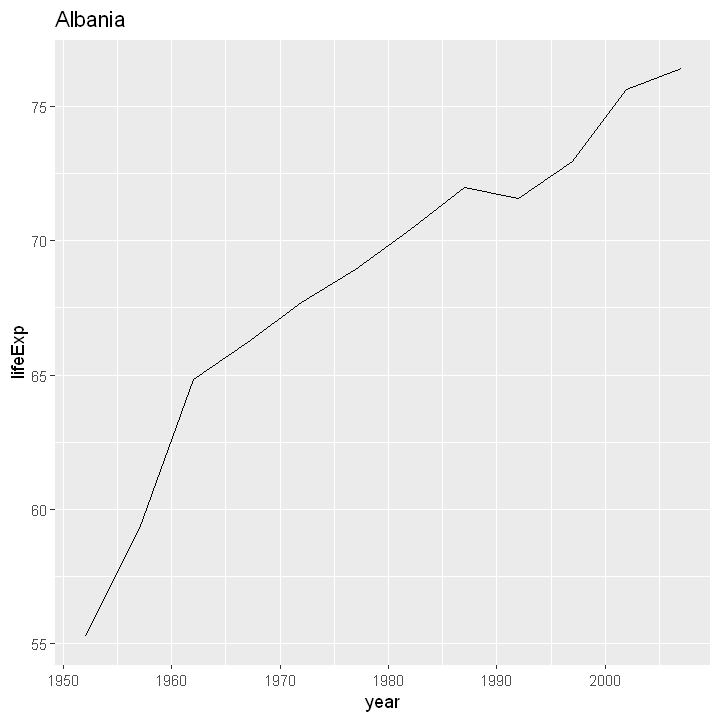

In [95]:
# Load the gap_split data
data(gap_split)

# Map over the first 10 elements of gap_split
plots <- map2(gap_split[1:10], 
              names(gap_split[1:10]), 
              ~ ggplot(.x, aes(year, lifeExp)) + 
                geom_line() +
                labs(title = .y))

# Object name, then function name
walk(plots[1:2], print)

<a name="toc_935640_4"></a>
## 4.   Complex problem solving with purrr

<a name="toc_935640_4.1"></a>
**<u>4.1 Creating graphs with purrr </u>**

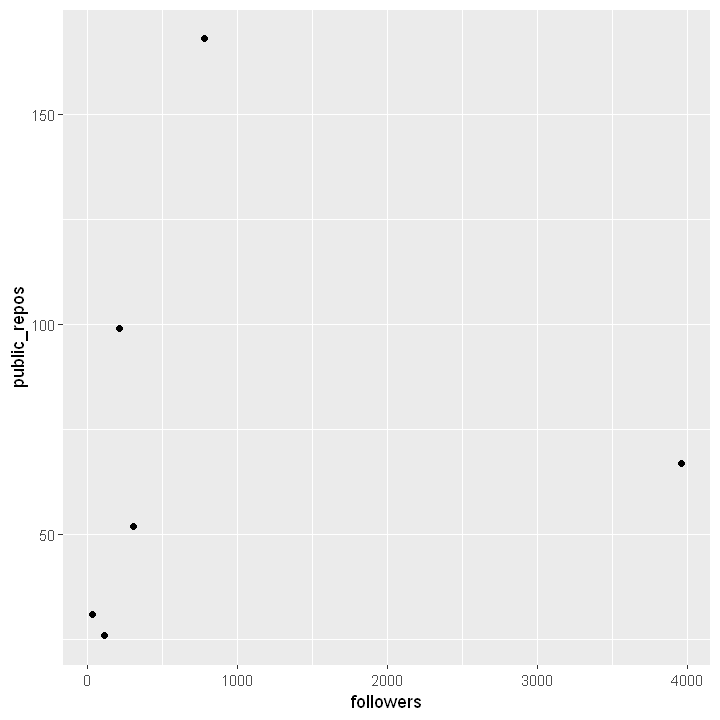

In [57]:
map_df(gh_users, `[`, 
       c("login","name","followers","public_repos")) %>%
  ggplot(aes(x = followers, y = public_repos)) + 
         geom_point()

☝️ we can map `[` just like any other function. Here we used `[` as a function to extract the elements "login","name","followers" and "public_repos".

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"
Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"
Warning message in geom_histogram(stat = "count"):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"
Warning message:
"Removed 6 rows containing non-finite values (`stat_count()`)."


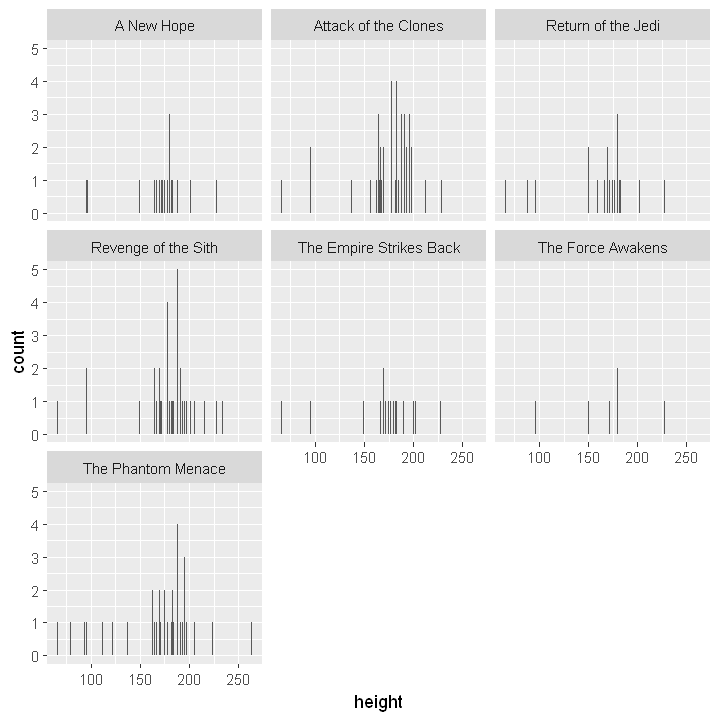

In [59]:
# Turn data into correct data frame format
film_by_character <- tibble(filmtitle = map_chr(sw_films, "title")) %>%
    mutate(filmtitle, characters = map(sw_films, "characters")) %>%
    unnest(cols = c(characters))

# Pull out elements from sw_people
sw_characters <- map_df(sw_people, `[`, c("height","mass","name","url"))

# Join our two new objects
character_data <- inner_join(film_by_character, sw_characters, by = c("characters" = "url")) %>%
    mutate(height = as.numeric(height), mass = as.numeric(mass))    # Make sure the columns are numbers

# Plot the heights, faceted by film title
ggplot(character_data, aes(x = height)) +
  geom_histogram(stat = "count") +
  facet_wrap(~ filmtitle)